# Introduction

In this guided project, we work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was collected and aggregated by the [American Community Survey](https://www.census.gov/programs-surveys/acs/data/pums.html), though the set we will be using is the cleaned version from [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors). Each row represents a different college major and contains information on things such as gender diversity, employment rates, median salaries, and more. The columns in the dataset are as follows.

- `Rank` - Rank by median earnings. Note that the dataset is ordered by this column.
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major, as determined by the report [*What's It Worth?: THe Economic Value of College Majors* by Carnevale et al](http://cew.georgetown.edu/whatsitworth)
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time, year-round workers **only**, who reported earnings of at least \$1. This sample is used for computing the earnings columns `Median`, `P25th`, and `P75th` for each major.
- `Men` - Number of male graduates.
- `Women` - Number of female graduates.
- `ShareWomen` - Proportion of women as share of total.
- `Employed` - Number employed in civilian jobs.
- `Full_time` - Number employed who work 35 hours or more per week.
- `Part_time` - Number employed who work less than 35 hours per week
- `Full_time_year_round` - Number employed at least 50 weeks of the year and work at least 35 hours per week.
- `Unemployed` - Number unemployed (not employed or in the armed forces and actively looking for work)
- `Unemployment_rate` - (Number Unemployed) / (Number Unemployed + Number Employed).
- `Median` - Median earnings of full-time, year-round workers, in USD.
- `P25th` - 25th percentile of earnings of full-time, year-round workers, in USD.
- `P75th` - 75th percentile of earnings of full-time, year-round workers, in USD.
- `College_jobs` - Number with job requiring a college degree.
- `Non_college_jobs` - Number with job not requiring a college degree.
- `Low_wage_jobs` - Number in low-wage service jobs.

This goal of this project is to use visualizations to explore questions from the dataset. Some of the questions we will explore include:

- Do students in more popular majors make more money? (Use scatterplots.)
- How many majors are predominantly male? Predominantly female? (Use histograms.)
- Which categories of majors have the most students? (Use bar plots.)

While we can use the [pandas interface with matplotlib](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for plotting data that is stored in [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#plotting) and [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting) objects, we will focus instead on using [seaborn](http://seaborn.pydata.org/index.html), which is a high-level library for making statistical graphics in Python that is built upon matplotlib and closely integrated with pandas. 

# Loading data and initial cleaning

To start, we first import the libraries we will use in this project. Then we load the data from the `recent_grads.csv` file into a pandas DataFrame to perform an initial inspection. We will check for null values, decide what to do with them, and then clean up the column names for more convenient usage later.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Magic command to ensure the plots are displayed inline
%matplotlib inline

In [3]:
recent_grads_filepath = "recent-grads.csv"

In [4]:
recent_grads = pd.read_csv(recent_grads_filepath)

In [5]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

As we can see there is a little bit of initial cleanup to do. First, we see that four of the columns, `Total`, `Men`, `Women`, and `ShareWomen` have null values. Let's check to see the affected columns by using the `DataFrame.isna()` and `DataFrame.any()` functions in tandem to create a boolean mask that selects only the rows which contain null entries.

In [7]:
recent_grads[recent_grads.isna().any(axis = "columns")]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


There is only one row with null entries, for the Food Science major. Since matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib (and therefore seaborn) to throw errors, we drop the affected row. This is fairly safe to do since it is only one row out of 173, but if we had a dataset with a higher proportion of rows with missing values we would need to consider if imputing the missing values would be more appropriate.

In [8]:
recent_grads.dropna(inplace = True)

Now that we've dropped the row with missing values, the next step is cleaning up the column names to make them a little more convenient to use later. In particular, we convert them to all lowercase and specifically convert the `ShareWomen` column to snakecase.

In [9]:
recent_grads_columns = recent_grads.columns.to_series()
recent_grads_columns.replace({"ShareWomen": "share_women"}, inplace = True)
recent_grads_columns = recent_grads_columns.str.lower()
recent_grads_columns

Rank                                    rank
Major_code                        major_code
Major                                  major
Total                                  total
Men                                      men
Women                                  women
Major_category                major_category
ShareWomen                       share_women
Sample_size                      sample_size
Employed                            employed
Full_time                          full_time
Part_time                          part_time
Full_time_year_round    full_time_year_round
Unemployed                        unemployed
Unemployment_rate          unemployment_rate
Median                                median
P25th                                  p25th
P75th                                  p75th
College_jobs                    college_jobs
Non_college_jobs            non_college_jobs
Low_wage_jobs                  low_wage_jobs
dtype: object

In [10]:
recent_grads.columns = recent_grads_columns

With the column names now cleaned up, it is time to explore summary statistics for the numeric columns (excluding `rank` and `major_code`).

In [11]:
recent_grads.drop(columns = ["rank", "major_code"]).describe()

,total,men,women,share_women,sample_size,employed,full_time,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Looking at the summary statistics for the numerical columns, there aren't any outliers that immediately jump out as being impossible among the maximum and minimum values. While some of the columns (e.g. `women`, `unemployed`, etc) have a minimum value of zero, this isn't impossible. While there certainly is more to say about the distributions of the columns just from the information these summary statistics provide, the goal of this project is to use visualizations to show the characteristics of the column distributions in a more intuitive way. With that in mind, we continue forward to our first visualization tool: scatterplots.

# Relating variables with scatterplots

In seaborn there are two main ways of producing scatterplots:  [the `scatterplot()` method](http://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot), which provides axes-level plotting for producing individual scatterplots, and [the `relplot()` method](http://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot), which provides a way to visualize the differences between one or more categorical facets of the data by producing facet grids. Some examples of how to use the two methods can be found in the [seaborn tutorial page for visualizing statistical relationships](http://seaborn.pydata.org/tutorial/relational.html). For our purposes, we will focus on using `scatterplot()` to produce scatterplots in order to try and answer the following questions.

- Do recent graduates from more popular majors make more money? 
- Are recent graduates from more popular majors more likely to be employed?
- Do recent graduates that majored in subjects that were majority female make more money? 
- Are recent graduates that majored in subjects that were majority female more likely to be employed?
- Is there any link between the number of full-time, recent graduate employees from a given major and median salary?

We start by exploring the relationship between major popularity and income by producing a scatterplot for `total` versus `median`.

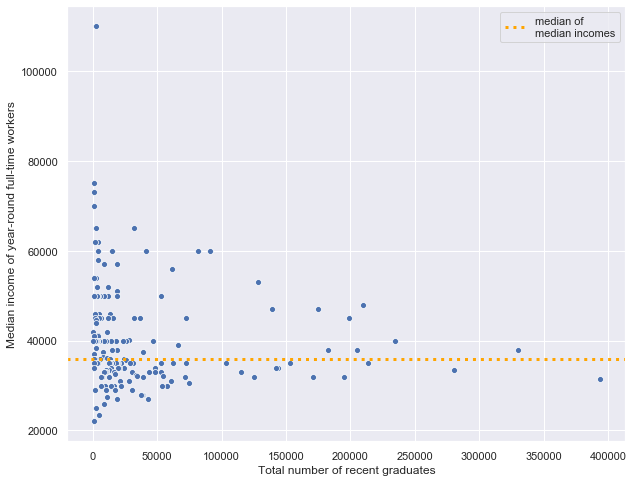

In [12]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = "total", y = "median", data = recent_grads, ax = ax)
ax.axhline(y = recent_grads["median"].median(), color = "orange", linestyle = ":", linewidth = 3,
          label = "median of \nmedian incomes")
ax.legend(loc = "best")
ax.set(xlabel = "Total number of recent graduates", ylabel = "Median income of year-round full-time workers");

There isn't any particularly clear relationship between major popularity and median income for year-round full-time workers, since some of the highest median incomes are from fairly unpopular majors, while some of the most popular majors have median incomes that are only slightly above, or even slightly lower, than the overall median among the median incomes. However, it does appear that the more popular majors tend to have median incomes that are closer to the overall median among median incomes, while there is a lot more income variability for less popular majors.

Next we explore the relationship between major popularity and unemployment rate by producing a scatterplot for `total` versus `unemployment_rate`.

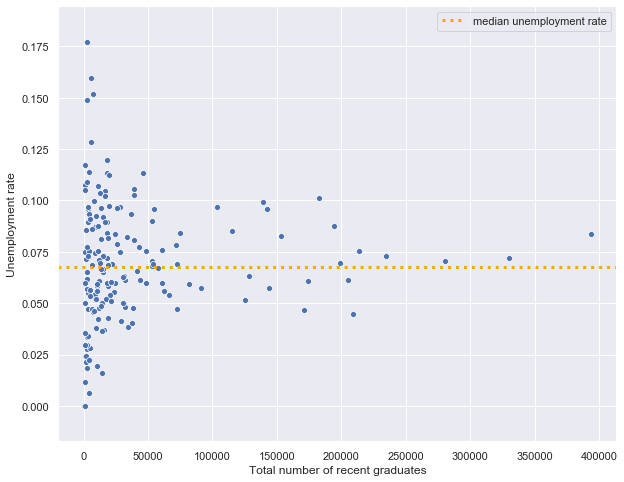

In [13]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = "total", y = "unemployment_rate", data = recent_grads, ax = ax)
ax.axhline(y = recent_grads["unemployment_rate"].median(), color = "orange", linestyle = ":", linewidth = 3,
          label = "median unemployment rate")
ax.legend(loc = "best")
ax.set(xlabel = "Total number of recent graduates", ylabel = "Unemployment rate");

There also isn't any particularly clear relationship between major popularity and unemployment rates. Once again, the main feature of note is the fact that there is a lot more variability for unemployment rates among less popular majors than there is for more popular majors. The more popular majors tend to have unemployment rates that are closer to to the median.

We now move on to exploring the relationship between proportion of female recent graduates and income.

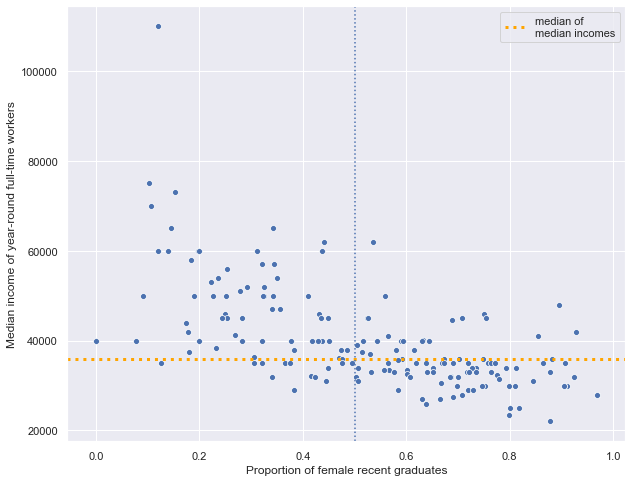

In [14]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = "share_women", y = "median", data = recent_grads, ax = ax)
ax.axhline(y = recent_grads["median"].median(), color = "orange", linestyle = ":", linewidth = 3,
          label = "median of \nmedian incomes")
ax.axvline(x = 0.5, linestyle = ":")
ax.legend(loc = "best")
ax.set(xlabel = "Proportion of female recent graduates", ylabel = "Median income of year-round full-time workers");

There appears to be a clear negative relationship between the proportion of women and income: majors that have a higher proportion of female recent graduates tend to have lower median incomes among year-round full-time workers who graduated with that major compared to majors with a lower proportion of female recent graduates. As we can see in the scatterplot, majors with more than 50% female recent graduates tend to have median incomes below the median for the data set, while majors with fewer than 50% female recent graduates tend to have median incomes above the median for the data set. We should note that an important confounding variable which underlies this scatterplot is the pay gap between men and women. Majors with majority male recent graduates may have tend to have higher median incomes than majors with majority female recent graduates simply because men are still paid more than women. One possible direction for further exploration would be to compare the median incomes for majors which had an increase in the proportion of female recent graduates between the 2010-2012 PUMS data and the 2013-2018 PUMS data.

Next we explore the relationship between proportion of female recent graduates and unemployment rate.

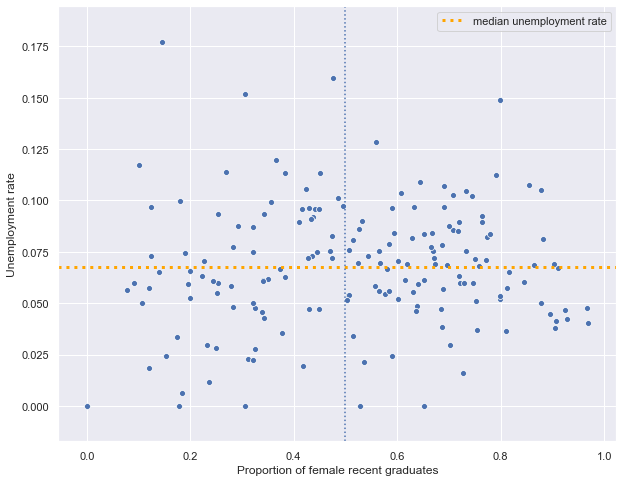

In [15]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = "share_women", y = "unemployment_rate", data = recent_grads, ax = ax)
ax.axhline(y = recent_grads["unemployment_rate"].median(), color = "orange", linestyle = ":", linewidth = 3,
          label = "median unemployment rate")
ax.axvline(x = 0.5, linestyle = ":")
ax.legend(loc = "best")
ax.set(xlabel = "Proportion of female recent graduates", ylabel = "Unemployment rate");

Looking at the scatterplot, there is no clear relationship between the proportion of women and unemployment rate. The data is distributed with no clear patterns.

Lastly, we look at the relationship between number of full-time, recent graduate employees from a given major and median salary.

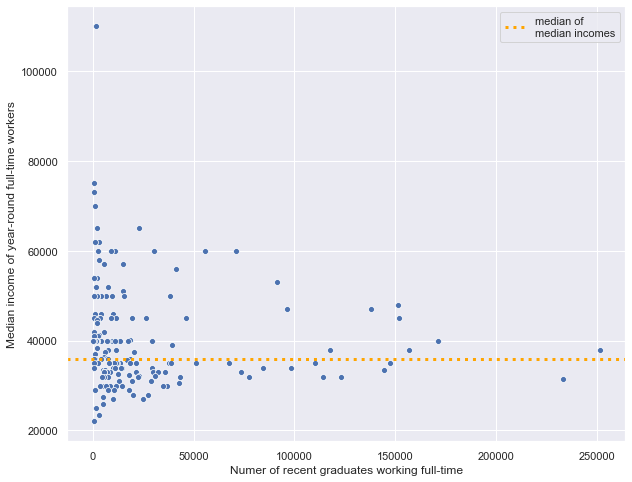

In [16]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.scatterplot(x = "full_time", y = "median", data = recent_grads, ax = ax)
ax.axhline(y = recent_grads["median"].median(), color = "orange", linestyle = ":", linewidth = 3,
          label = "median of \nmedian incomes")
ax.legend(loc = "best")
ax.set(xlabel = "Numer of recent graduates working full-time", ylabel = "Median income of year-round full-time workers");

The scatterplot for `full_time` versus `median` is very similar to that for `total` versus `median`. The main discernible pattern is that there is a lot more variability among median incomes for majors with a small number of recent graduates working full-time compared to majors with a large number of recent graduates working full-time.

# Visualizing distributions with histograms

In seaborn the [primary method for producing histograms is `distplot()`](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot), which by default will produce a histogram overlaid with a kernel density estimate (KDE) for the distribution. As discussed in the [tutorial](http://seaborn.pydata.org/tutorial/distributions.html), while seaborn uses a generally good default bin size (the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)) when producing histograms, it can be helpful to play around with different bin sizes for the histograms using the `bins` argument. The analogous argument for KDEs is `bw`, which specifies the widths of the Gaussian curves used to fit the KDE.

We will produce histograms for the columns `total`, `median`, `employed`, `full_time`, `share_women`, `unemployment_rate`, `men`, and `women` to explore their distributions.

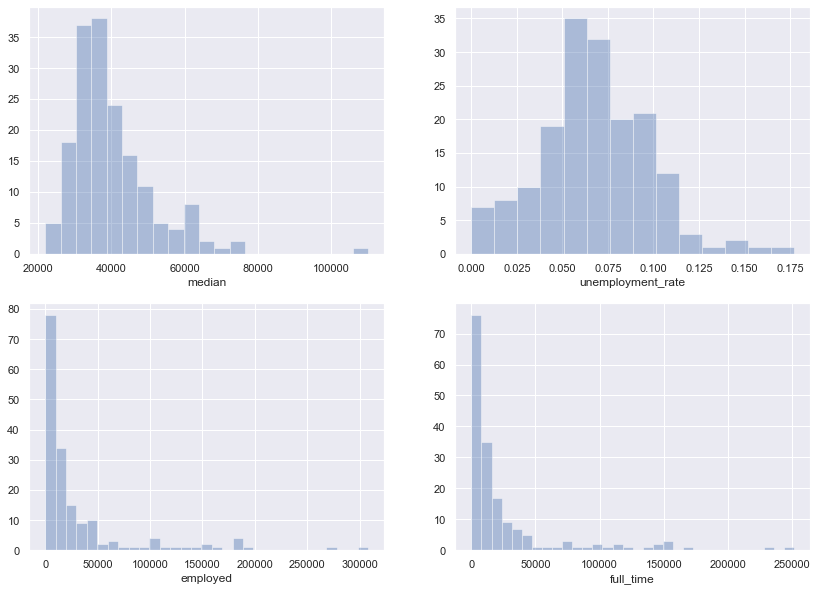

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
sns.distplot(recent_grads["median"], ax = axes[0, 0], kde = False)
sns.distplot(recent_grads["unemployment_rate"], ax = axes[0, 1], kde = False)
sns.distplot(recent_grads["employed"], ax = axes[1, 0], kde = False)
sns.distplot(recent_grads["full_time"], ax = axes[1, 1], kde = False);

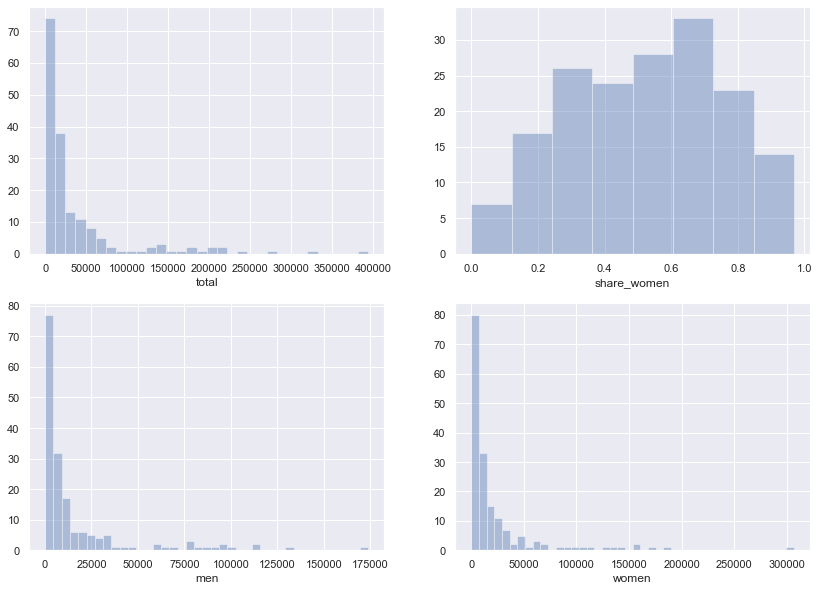

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
sns.distplot(recent_grads["total"], ax = axes[0, 0], kde = False)
sns.distplot(recent_grads["share_women"], ax = axes[0, 1], kde = False)
sns.distplot(recent_grads["men"], ax = axes[1, 0], kde = False)
sns.distplot(recent_grads["women"], ax = axes[1, 1], kde = False);

Looking at the histograms, we first observe that the overall shape of the distributions for `employed`, `full_time`, `total`, `men`, and `women` are all very similar: clustered to the left with most of the majors having between zero and 25,000 recent grads for each category, and long tails out to the right.  This suggests that it would be enlightening to focus in on that portion of the range for each of those columns. The next thing of note is that the majors are approximately evenly split between those which have majority female recent graduates and those which have majority male recent graduates. Moving on to the histogram for `unemployment_rate`, we that it has a somewhat normal distribution centered around an unemployment rate of 0.0625, or 6.25%, though it is slightly skewed to the left. Lastly, looking at the histogram for `median`, we see that the most common median salary range is approximately \$30,000-40,000.

Now we look more closely at majors that have fewer than 50,000 graduates to exclude the long tails that made the histograms for `total`, `employed`, `men` and `women` more difficult to read.

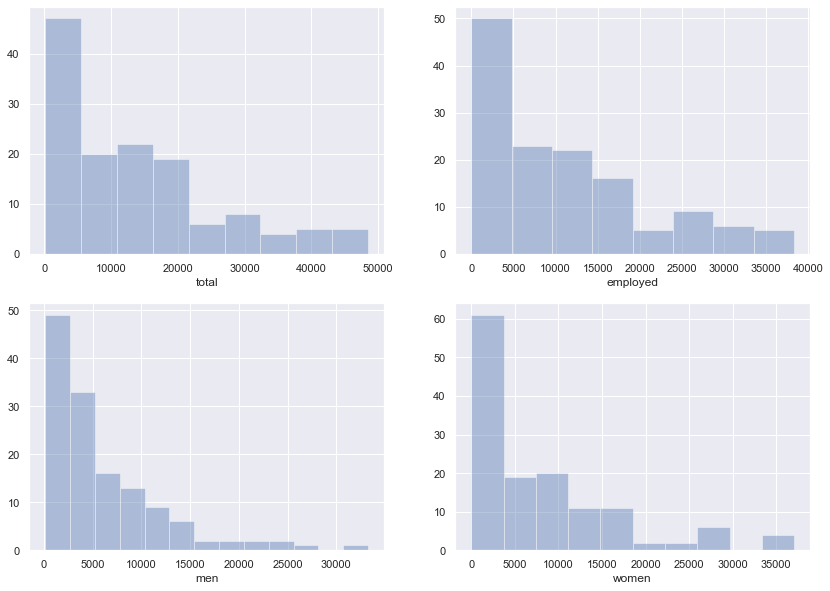

In [19]:
# Focus specifically on majors with fewer than 50,000 recent graduates
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))
sns.distplot(recent_grads.loc[recent_grads["total"] < 50000, "total"], ax = axes[0, 0], kde = False)
sns.distplot(recent_grads.loc[recent_grads["total"] < 50000, "employed"], ax = axes[0, 1], kde = False)
sns.distplot(recent_grads.loc[recent_grads["total"] < 50000, "men"], ax = axes[1, 0], kde = False)
sns.distplot(recent_grads.loc[recent_grads["total"] < 50000, "women"], ax = axes[1, 1], kde = False);

Looking more closely at the majors with fewer than 50,000 recent graduates, we can see some clearer patterns. While the distributions are still very much skewed to the left, it is easier to see, for example, that the there is a sharp drop-off in the number of majors with between 0 and 5,000 women and majors with more than 5,000 women.

# Combining scatterplots and histograms into a scatterplot matrix

In the previous two sections, we produced individual scatterplots to explore the relationships between pairs of variables and individual histograms to explore the distributions of single variables. If we wish to explore potential relationships and distributions simultaneously, we can do so by producing a *scatterplot matrix*. A scatterplot matrix is an $n \times n$ grid of plots where the plot in the $i$th row and $j$th column is a scatterplot between the $i$th and $j$th variables when $i \neq j$, and the plots on the diagonal are histograms for each individual variable. There are two main ways of producing a scatterplot matrix with seaborn. The first method, which is most convenient if we wish to quickly produce a scatterplot matrix, is the [`pairplot()` function](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot). For example, we can use `pairplot()` to quickly produce a scatterplot matrix for all of the numeric columns in our `recent_grads` dataset.

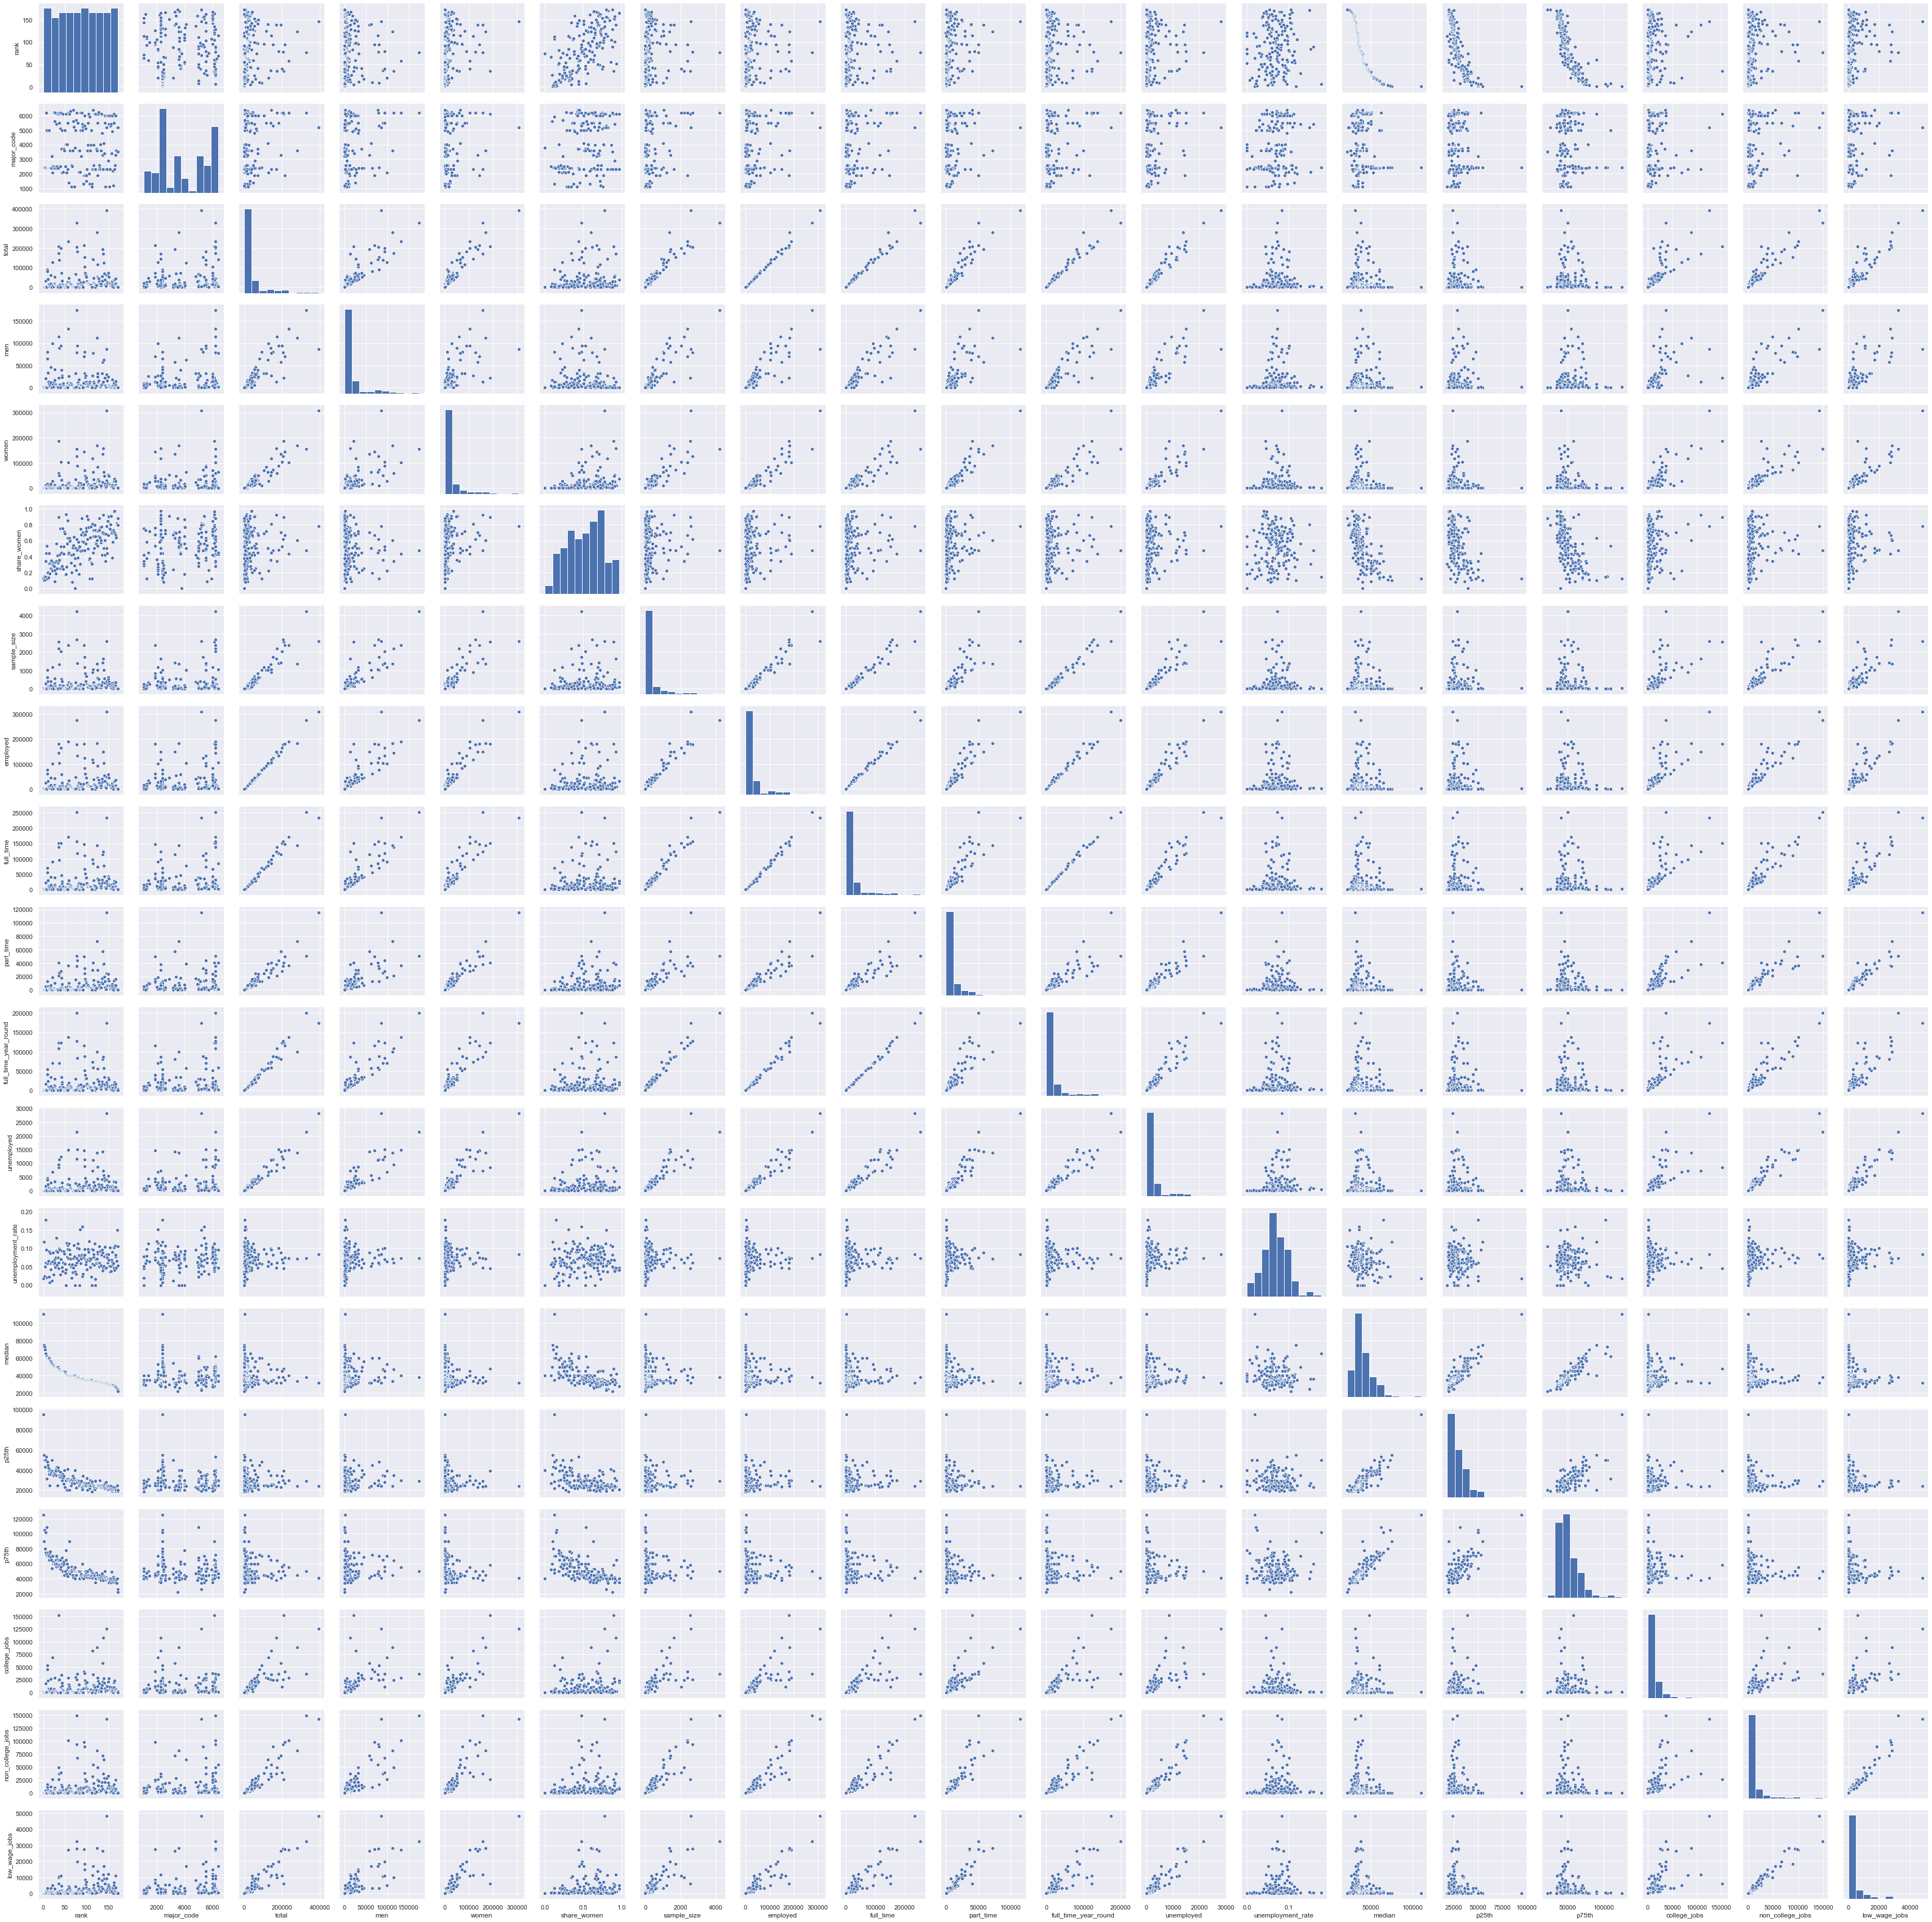

In [20]:
sns.pairplot(recent_grads);

Since the dataset has 19 numeric columns, a scatterplot matrix involving all 19 of them is pretty unwieldy to work with. To focus in on a few key variables that we might wish to explore, we can pass in a list of variable names to the `vars` argument. For example, we might want to focus our attention just on the `sample_size` and `median` columns. Before producing the smaller scatterplot matrix, we should note that the vertical axis ticks *do not* correspond to the count or density for the histograms on the diagonal. They are for the off-diagonal scatterplots. 

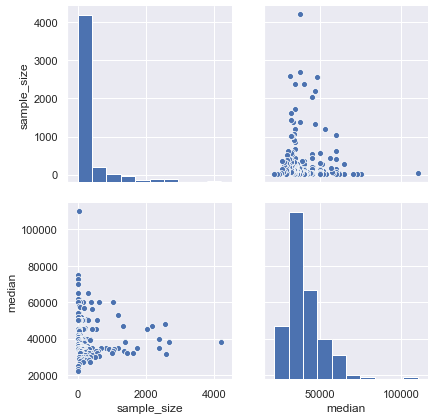

In [21]:
sns.pairplot(recent_grads, vars = ["sample_size", "median"], height = 3);

We could also make a scatterplot matrix to simultaneously explore `sample_size`, `median`, and `unemployment_rate`.

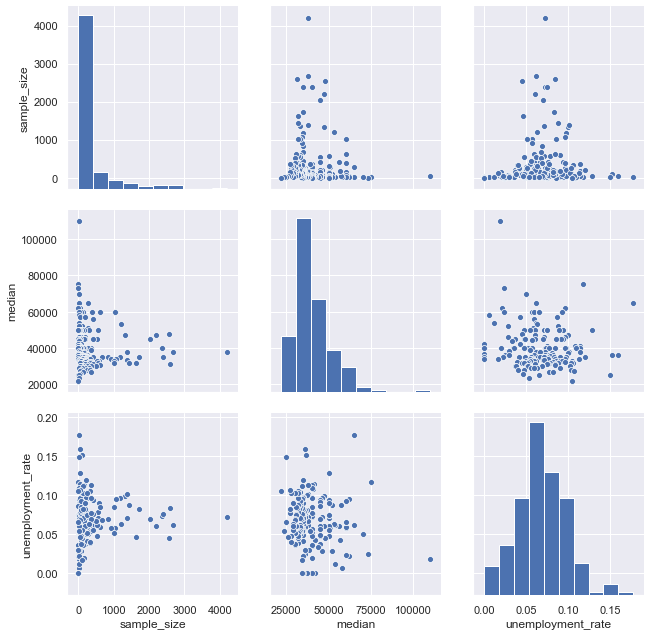

In [22]:
sns.pairplot(recent_grads, vars = ["sample_size", "median", "unemployment_rate"], height = 3);

The `pairplot()` function is a high-level interface for the [`PairGrid` class](http://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid). If we wish to have more flexibility when [producing plots to explore pairwise data relationships](http://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships), then creating a `PairGrid` object and manipulating it directly is generally preferable to the `pairplot()` function. Regardless of how we choose to produce scatterplot matrices with seaborn, they are a helpful tool that we could have used instead of the individual scatterplots and histograms we produced to explore the questions we considered in the previous sections.

# Comparing estimates of central tendency across categorical facets

Next, we use seaborn to produce barplots to compare the value of a numerical variable across different categorical facets. To do this, we can either use the [figure-level function `catplot()`](http://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) and provide the argument `kind = "bar"`, or use the [axis level function `barplot()`](http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot). While with this particular data set we are already given the values of the numerical variables for each major, seaborn can also take take a full dataset in which each row is an observation and each column is a variable and apply a function (by default the arithmetic mean) to compute the desired estimate for the target numerical variable for each category. In particular, if each category has multiple observations, then seaborn can use bootstrapping to compute a confidence interval for the estimate and include error bars on the plot. This is discussed in more detail in the [tutorial for statistical estimation within categories](http://seaborn.pydata.org/tutorial/categorical.html#statistical-estimation-within-categories).

First, we produce a barplot to compare the percentages of women in the first ten rows of the `recent_grads` data (corresponding to the ten majors with the highest median earnings among recent graduates who are full-time year-round workers) and the percentages of women in the last ten rows (corresponding to the ten majors with the lowest median earnings). Note that we produce a horizontally-oriented barplot by using the `orient` argument to improve readability.

In [23]:
top_bottom_10 = recent_grads.head(10).append(recent_grads.tail(10))

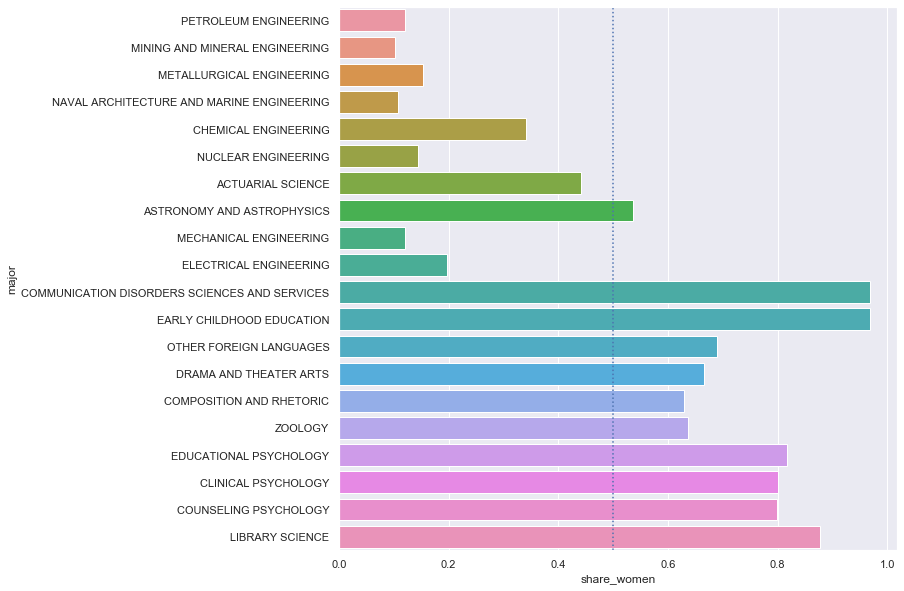

In [24]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(y = "major", x = "share_women", orient = "h", ax = ax, data = top_bottom_10)
ax.axvline(x = 0.5, linestyle = ":");

Looking at the above barplot, we immediately see that the majors with the highest median incomes are very male-dominated, with only three of them (chemical engineering; actuarial science; and astronomy and astrophysics) having more than 30% women, and only astronomy and astrophysics having a majority of female recent graduates. In contrast, the majors with the lowest median incomes are all majority-women, with six of them having 80% or more women. This agrees with the scatterplot we produced that compared median income vs. proportion of female recent graduates, which showed that median income tended to decrease going from majors with a low proportion of women to majors with a high proportion of women. the Also of note is that all of the majors in the top ten are STEM majors, and in particular eight of them are some form of engineering. 

Next, we produce a barplot to compare unemployment rates between the majors with the highest median incomes and those with the lowest.

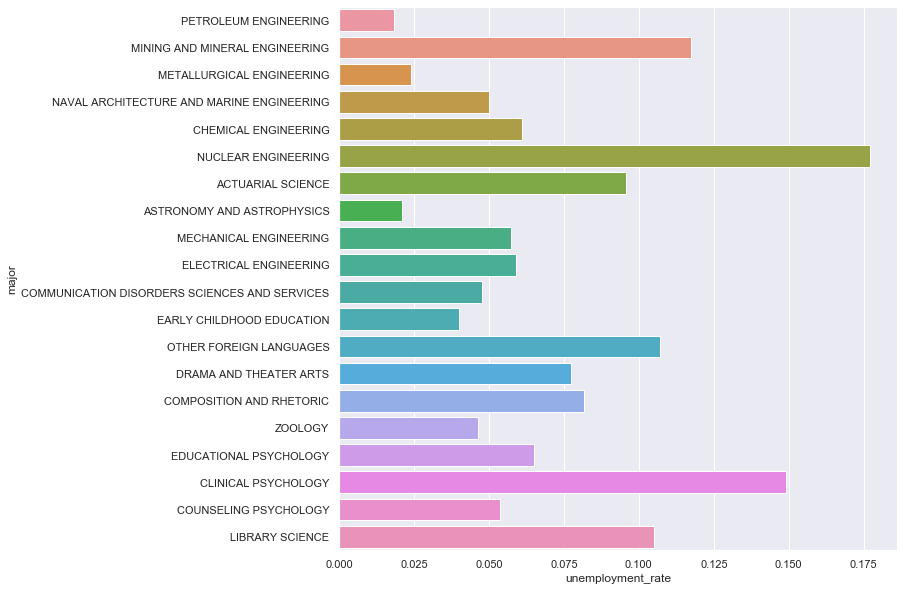

In [25]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(y = "major", x = "unemployment_rate", orient = "h", ax = ax, data = top_bottom_10);

This barplot shows that, at least among the top ten and bottom ten, the median income for a major is not necessarily correlated with unemployment rate. While the top ten has the majors with the lowest unemployment rates (petroleum engineering, metallurgical engineering, astronomy and astrophysics), it also has majors with some of the highest unemployment rates in this group of twenty (nuclear engineering, mining and mineral engineering). Visually, there appears to be a lot more variance in unemployment rates in the top ten when compared to the bottom ten. We can also refer to the scatterplot of median income versus unemployment rate that we produced in the section about scatterplot matrices to confirm that there does not appear to be a relationship between those two variables.

Lastly, we produce some barplots to compare the numbers of male and female recent graduates across major categories, as well as the proportion of female recent graduates. Due to the original structure of the dataset, we cannot use the `hue` argument of the `barplot()` function to conveniently make a grouped barplot. Instead, we use pandas aggregation to compute the total number of male and female recent graduates for each major category, and then plot two barplots on the same figure. When doing this, we make sure to use the `sharex` argument to ensure that both plots use the same scale on the $x$-axis so the bars are comparable between the two subplots.

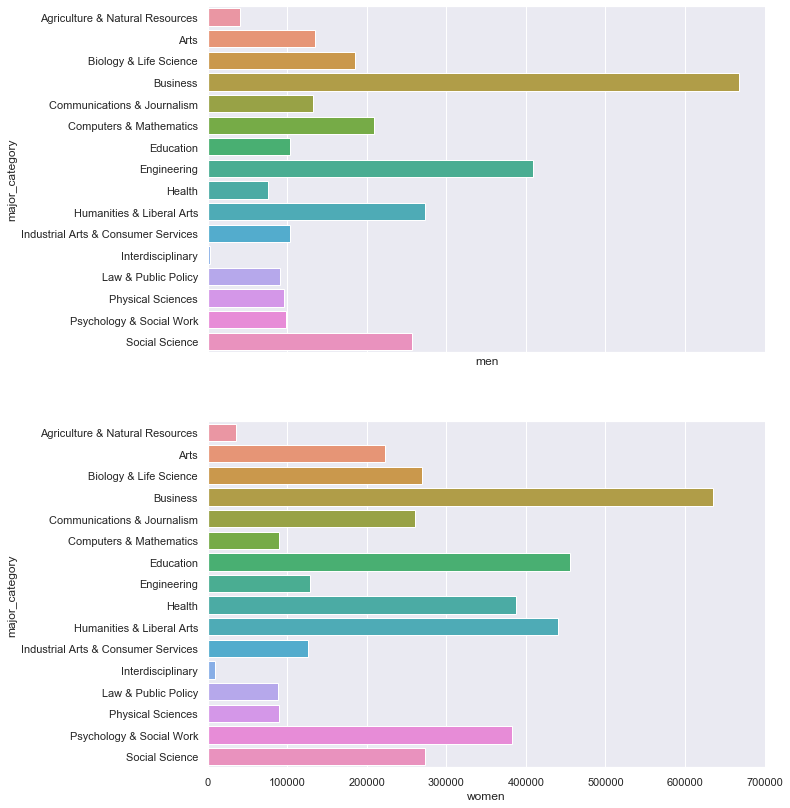

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 14), sharex = "col")
sns.barplot(y = "major_category", x = "men", orient = "h", ax = ax[0], 
            data = recent_grads.groupby("major_category").sum().reset_index())
sns.barplot(y = "major_category", x = "women", orient = "h", ax = ax[1], 
            data = recent_grads.groupby("major_category").sum().reset_index());

One thing that stands out initially is that business is the most popular major category for both men and women, but then from there the other popular majors diverge. In particular, the most popular major categories for men, after business, are engineering, humanities and liberal arts, social science, and computers and mathematics. In contrast, the next most popular major categories for women are education, humanities and liberal arts, health, and psychology and social work. 

We can also compare the average proportion of female recent graduates between major categories. As we can see below, about half of the major categories are solidly majority female, on average, since the lower end of the 95% confidence interval for the mean proportion of women clears the 0.5 mark. In particular, majors in psychology and social work, health, and education have a high proportion of women, on average, while majors in engineering, computers, and mathematics are very male-dominated.

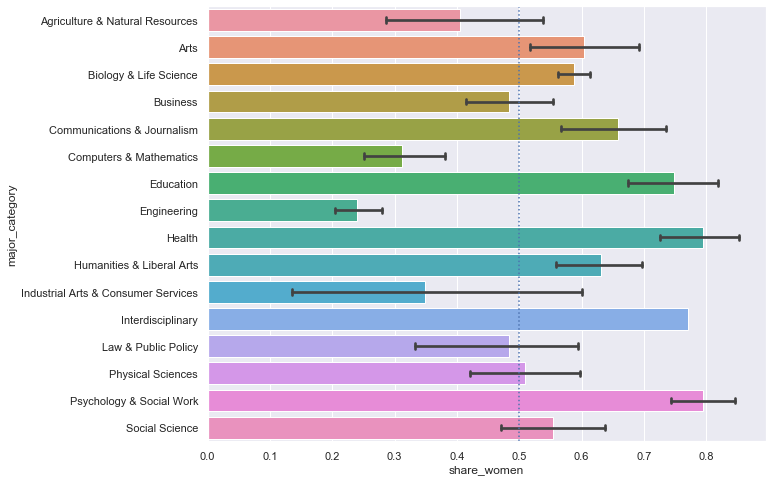

In [27]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(y = "major_category", x = "share_women", orient = "h", order = np.sort(recent_grads["major_category"].unique()),
            capsize = 0.2, ax = ax, data = recent_grads)
ax.axvline(x = 0.5, linestyle = ":");

# Comparing distributions across categorical facets

The last visualization strategy we explore in this project is the [boxplot](http://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories), which is another way to visualize the distribution of values for a numerical variable. Just as with barplots, there are two main ways of producing boxplots in seaborn: the figure-level function `catplot()` with the argument `kind = "box"`, or the [axis-level `boxplot()` function](http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot). Both functions allow us to compare distributions across categorical facets by supplying the `hue` argument. For example, we can compare the distributions of median salaries between the different major categories. For larger datasets, seaborn can also produce [boxenplots](http://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) and [violinplots](http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot), which are variants of boxplots that are more optimized for showing more information about the shape of the distribution within each category.

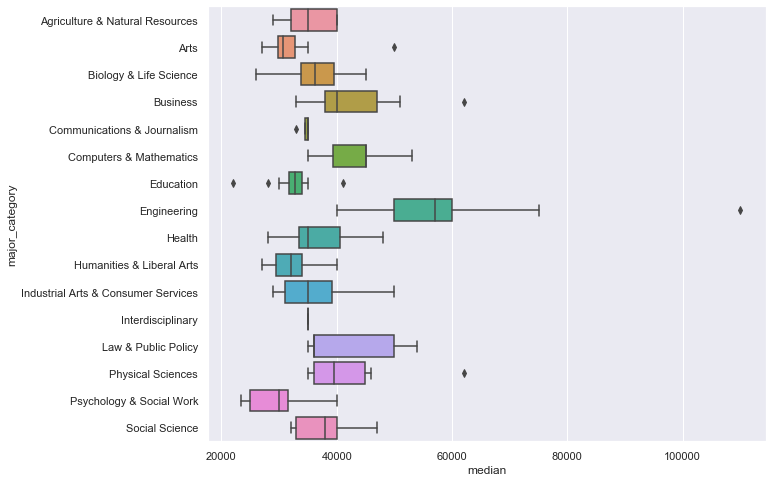

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(y = "major_category", x = "median", orient = "h", order = np.sort(recent_grads["major_category"].unique()),
            ax = ax, data = recent_grads);

From the boxplots, we can see that engineering majors typically have the highest median salaries, with a median value that exceeds the maximum median salary of almost every other major category. There is, however, an extremely wide range between the highest and lowest median salary values for engineering majors, which indicates more variability within that category compared to categories such as education or arts. At the other end of the spectrum, it appears that psychology and social work majors tend to have the lowest median salaries.

We can similarly compare the distribution of unemployment rates between major categories.

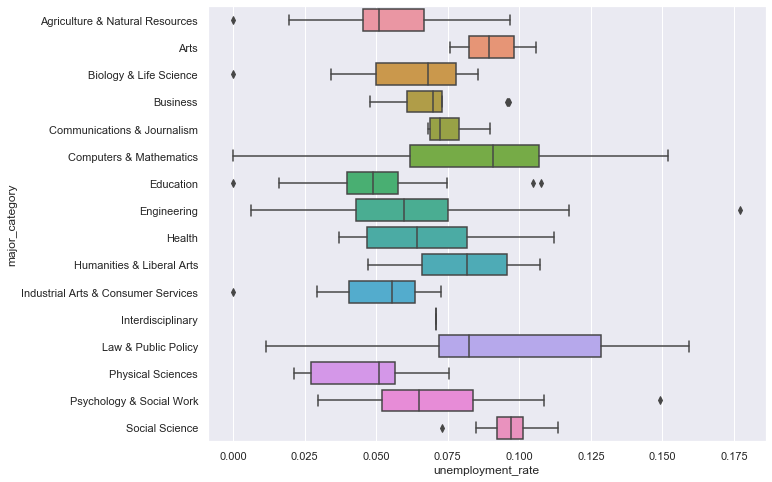

In [29]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(y = "major_category", x = "unemployment_rate", orient = "h", order = np.sort(recent_grads["major_category"].unique()),
            ax = ax, data = recent_grads);

Here, we can see that arts and social science majors tend to have higher unemployment rates than the other categories, but since many of the distributions are rather wide it is hard to draw definitive conclusions from this group of boxplots on its own. Also of note are the categories wich a wide range of unemployment rates: computers and mathematics; law and public policy; and engineering.

Lastly, we can create a categorical column for the majors which are majority women and compare the distributions of median income and unemployment rate between majors which are majority women and majors which are majority men.

In [31]:
recent_grads["majority_women"] = recent_grads["share_women"] > 0.5

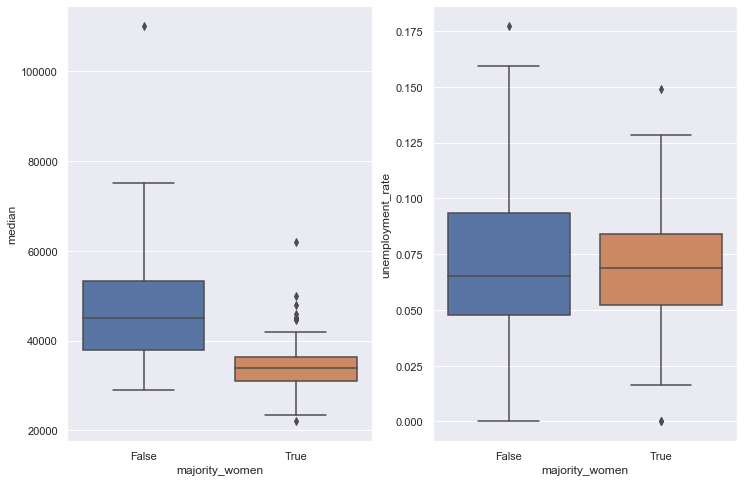

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))
sns.boxplot(x = "majority_women", y = "median", ax = ax[0], data = recent_grads)
sns.boxplot(x = "majority_women", y = "unemployment_rate", ax = ax[1], data = recent_grads);

Between these two pairs of boxplots, we can make two initial observations. First, the majors which were majority women tended to have lower median salaries, and also a much narrower range of median salaries, compared to the majors which were majority men. Second, there isn't much difference in the distribution of unemployment rates between majority female and majority male majors, though the majority female majors do appear to have a narrower range of unemployment rates.

# Conclusion and potential next steps

Over the course of this notebook, we produced some basic visualizations using seaborn to explore the income and employment data for recent graduates from a variety of college majors between 2010 and 2012. In particular, we started by using scatterplots to relate pairs of numeric variables and histograms to visualize the distributions of numeric variables. We also explored how to quickly visualize the pairwise relationships and distributions of multiple numeric variables at once by producing scatterplot matrices. From there, we transitioned to using barplots to compare estimates of central tendency between categories and boxplots to compare the distributions of a numeric variable between different categories. These visualizations allowed us to explore questions such as how median salary for a major is related to the proportion of women in that major and how do unemployment rates and median salaries compare between different major categories.

Beyond the work we have done in this notebook, there are a number of potential next steps. Some of them include the following.

- Download the PUMS data for 2013-2018, clean and aggregate it, and recreate all of the visualizations we have made in this notebook.
- Download the PUMS data for 2005-2018, clean and aggregate it, and produce animated or interactive visualizations to see how various variables, such as proportion of women or inflation-adjusted median salary, have changed over time for each major. This could be done using either [Plotly](https://plot.ly/python/) or [Bokeh](https://docs.bokeh.org/en/latest/index.html).
- Make visualizations to compare the types of jobs (jobs which do or do not require a college degree, low wage service jobs) the recent graduates have between different major categories and between majority-male/majority-female majors.
- Produce hexbin plots to visualize columns which had dense scatterplots.